In [32]:
import pandas as pd

data=pd.read_csv('Titanic-Dataset.csv',index_col='PassengerId')
data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
#Checking missing values
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [34]:
#missing value precentage
print((data.isnull().sum()/len(data))*100)

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64


In [35]:
#handeling missing values
data['Age']=data['Age'].fillna(data['Age'].median())

In [36]:
data=data.drop('Cabin' ,axis=1)

In [37]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [46]:
#data after cleaning
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [39]:
#view data information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


In [40]:

# Numerical columns
numerical_cols = data.select_dtypes(include=['int', 'float']).columns
print("Numerical columns:", numerical_cols)

# Categorical columns
categorical_cols = data.select_dtypes(include='object').columns
print("Categorical columns:", categorical_cols)

Numerical columns: Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Categorical columns: Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

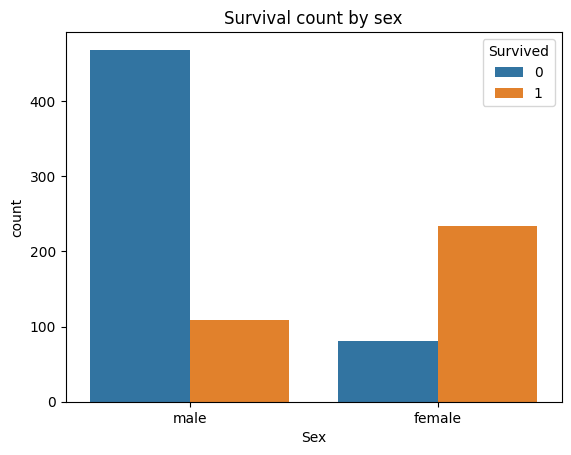

In [42]:
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title("Survival count by sex")
plt.show()


This bar chart shows the number of passengers who survived and did not survive, grouped by gender.

- Most male passengers did not survive.

- Most female passengers survived.

- This shows that gender had a strong influence on survival.

- Women were more likely to be rescued than men.

 Conclusion: Gender is an important factor affecting survival.

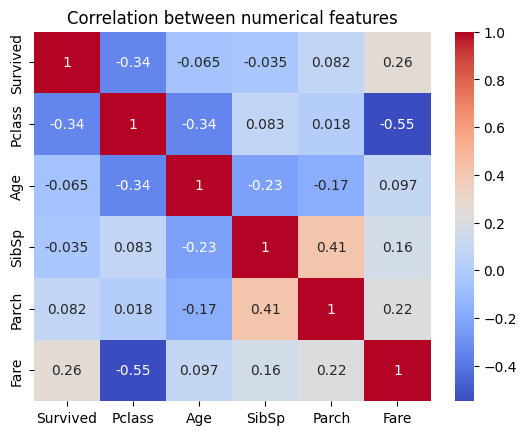

In [43]:
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between numerical features")
plt.show()

the heatmap shows the correlation between numerical variables such as survival, passenger class, age, and fare.


- Survival and Passenger Class (Pclass) have a negative correlation (-0.34)
Passengers in lower classes had a lower chance of survival.

- Survival and Fare have a positive correlation (0.26)
Passengers who paid higher fares were more likely to survive.

- Pclass and Fare show a strong negative correlation (-0.55)
Higher-class passengers paid higher fares.

Conclusion: Passenger class and fare are strong factors in survival outcomes.

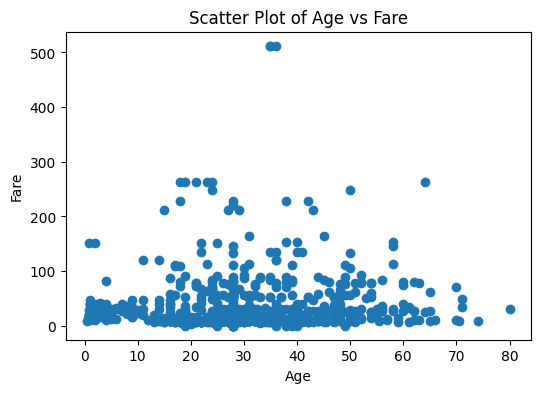

In [44]:
plt.figure(figsize=(6,4))
plt.scatter(data['Age'], data['Fare'])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Scatter Plot of Age vs Fare")
plt.show()

This scatter plot shows the relationship between age and ticket fare.

- Most passengers paid low fares across all ages.

- A few passengers paid very high fares, mostly adults.

- There is no strong linear relationship between age and fare.

Conclusion: Age does not strongly affect ticket price, but high fares are more common among adults.

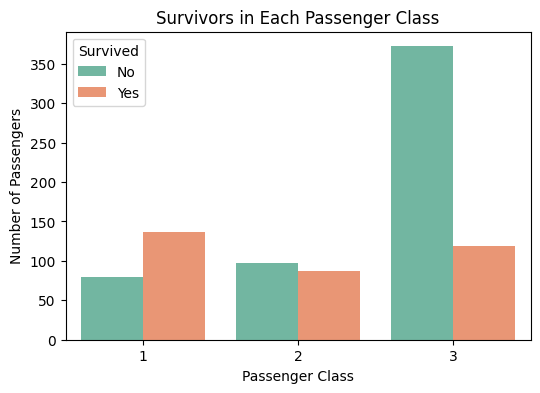

In [45]:
# Countplot of survivors by class
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=data, palette='Set2')
plt.title("Survivors in Each Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

The bar chart displays survival outcomes grouped by passenger class (1 = First, 2 = Second, 3 = Third).

- **First Class (Pclass 1):**  
  - Survived: ~140  
  - Did not survive: ~80  
  → Highest survival rate among all classes.

- **Second Class (Pclass 2):**  
  - Survived: ~90  
  - Did not survive: ~95  
  → Roughly equal survival and mortality.

- **Third Class (Pclass 3):**  
  - Survived: ~120  
  - Did not survive: ~370  
→ Lowest survival rate; largest number of fatalities.

### Interpretation
There is a clear association between passenger class and survival probability. Passengers in higher socioeconomic classes (especially First Class) were significantly more likely to survive, reflecting preferential access to lifeboats and other emergency resources during the sinking of the Titanic. This highlights the role of social class in disaster outcomes.